In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
df_vibe = pd.read_csv('/content/unique_employees_weighted_vibe.csv')
df = pd.read_csv('/content/unique_employees_weighted_performance.csv')

In [ ]:
df_vibe.shape

(315, 2)

In [ ]:
df.shape

(322, 4)

In [ ]:
df.head()

,Employee_ID,Manager_Feedback,Promotion_Consideration,Performance_Rating
0,EMP0001,1.00,0.0,4.0
1,EMP0002,2.00,1.0,3.0
2,EMP0003,1.50,0.5,2.5
3,EMP0004,0.50,0.0,2.5
4,EMP0006,1.25,0.5,1.5


In [ ]:
df_merged = pd.merge(df, df_vibe[['Employee_ID', 'Weighted_vibe_Score']], on='Employee_ID', how='right')
df_merged.head()

,Employee_ID,Manager_Feedback,Promotion_Consideration,Performance_Rating,Weighted_vibe_Score
0,EMP0002,2.00,1.0,3.0,1.0000
1,EMP0003,1.50,0.5,2.5,2.9996
2,EMP0004,0.50,0.0,2.5,4.0000
3,EMP0005,NaN,NaN,NaN,3.0000
4,EMP0006,1.25,0.5,1.5,5.0000


In [ ]:
df_merged.shape

(315, 5)

In [ ]:
df_merged.isna().sum()

,0
Employee_ID,0
Manager_Feedback,107
Promotion_Consideration,107
Performance_Rating,107
Weighted_vibe_Score,0


In [ ]:
df_merged.fillna(0, inplace = True)

In [ ]:
df_merged.isna().sum()

,0
Employee_ID,0
Manager_Feedback,0
Promotion_Consideration,0
Performance_Rating,0
Weighted_vibe_Score,0


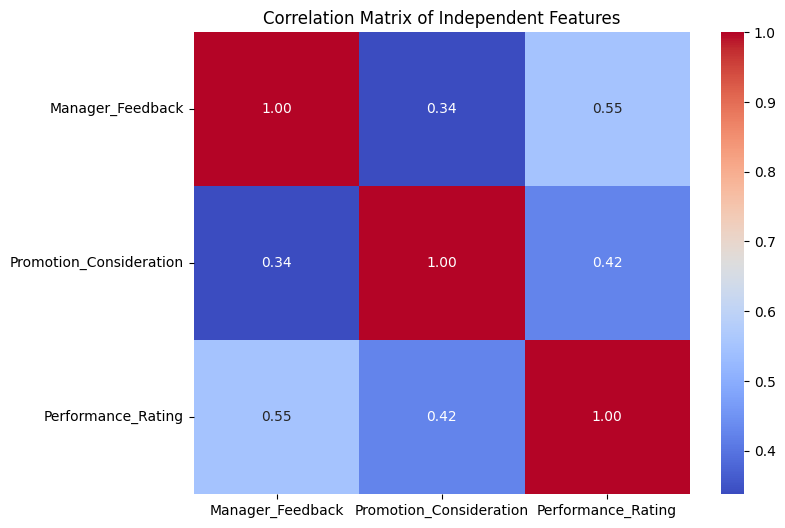

In [ ]:
independent_features = ['Manager_Feedback', 'Promotion_Consideration', 'Performance_Rating']
correlation_matrix = df_merged[independent_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Independent Features")
plt.show()

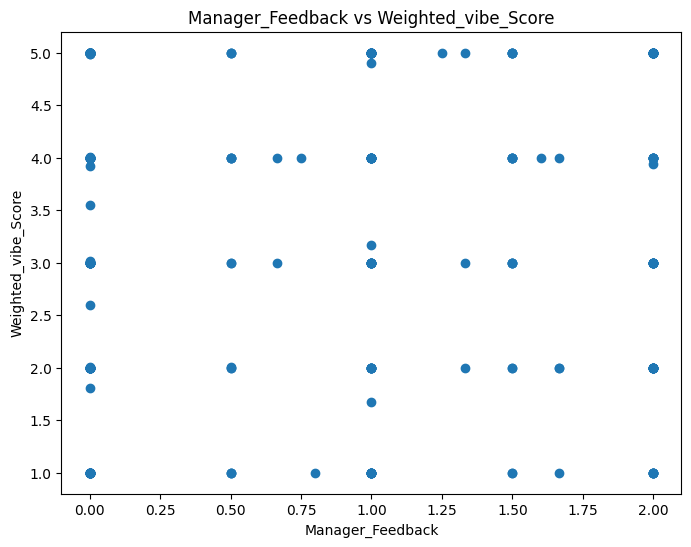

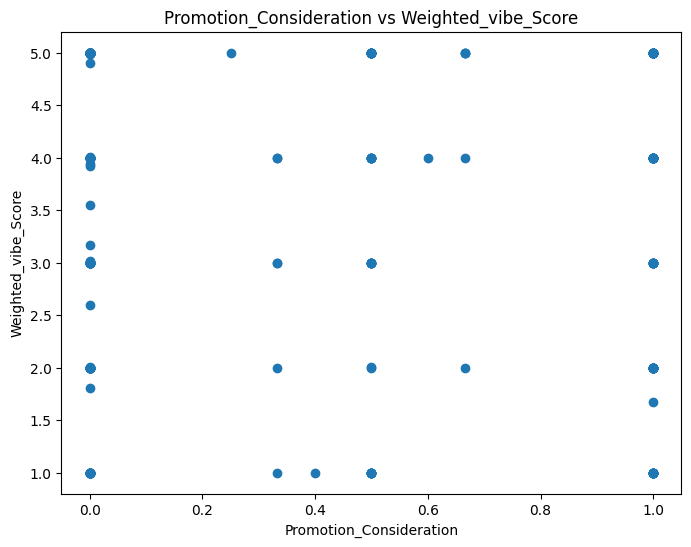

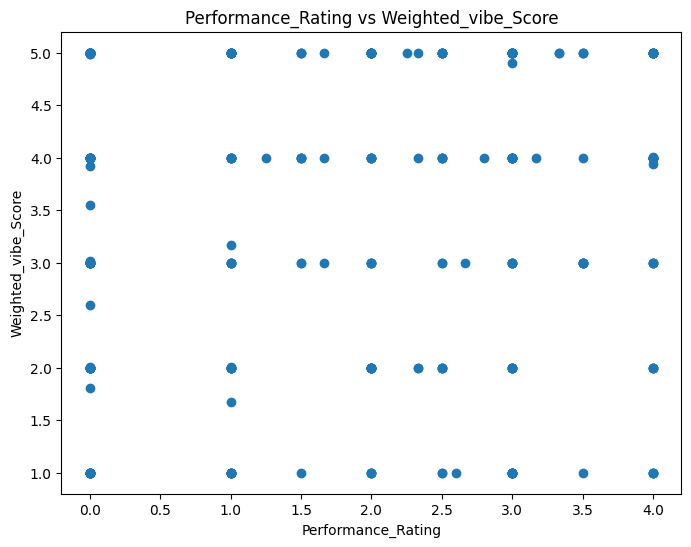

In [ ]:
for feature in independent_features:
  plt.figure(figsize=(8, 6))
  plt.scatter(df_merged[feature], df_merged['Weighted_vibe_Score'])
  plt.xlabel(feature)
  plt.ylabel('Weighted_vibe_Score')
  plt.title(f'{feature} vs Weighted_vibe_Score')
  plt.show()

In [ ]:
correlation_with_emotion = df_merged[independent_features + ['Weighted_vibe_Score']].corr()['Weighted_vibe_Score'][:-1]

print("Correlation between independent features and Weighted_vibe_Score:")
correlation_with_emotion

Correlation between independent features and Weighted_vibe_Score:


,Weighted_vibe_Score
Manager_Feedback,0.001159
Promotion_Consideration,-0.038752
Performance_Rating,0.016694


In [ ]:
X = df_merged[independent_features].values
y = df_merged['Weighted_vibe_Score'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
input_layer = Input(shape=(X_scaled.shape[1],))

encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded_feature = Dense(1, activation='linear', name='combined_feature')(encoded)

output_layer = Dense(1, activation='linear', name='vibe_score_prediction')(encoded_feature)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse')

model.fit(X_scaled, y, epochs=500, batch_size=4, verbose=1, shuffle=True)

Epoch 1/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13.5901
Epoch 2/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5893
Epoch 3/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3010
Epoch 4/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3181
Epoch 5/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4631
Epoch 6/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2927
Epoch 7/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1089
Epoch 8/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3150
Epoch 9/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2713
Epoch 10/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1999
Epoch 11/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2911
Epoch 12/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3716
Epoch 13/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2384
Epoch 14/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2633
Epoch 15/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1535
Epo

In [ ]:
encoder = Model(inputs=input_layer, outputs=encoded_feature)
df_merged['combined_feature_performance'] = encoder.predict(X_scaled)

df_merged[['Employee_ID', 'combined_feature_performance', 'Weighted_vibe_Score']]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


,Employee_ID,combined_feature_performance,Weighted_vibe_Score
0,EMP0002,-5.087850,1.0000
1,EMP0003,-7.691552,2.9996
2,EMP0004,-5.724668,4.0000
3,EMP0005,-7.286052,3.0000
4,EMP0006,-9.174345,5.0000
...,...,...,...
310,EMP0491,-8.575239,5.0000
311,EMP0493,-7.286052,2.0074
312,EMP0497,-7.286051,2.0000
313,EMP0498,-8.458725,5.0000


In [ ]:
df_merged[['combined_feature_performance', 'Weighted_vibe_Score']].corr()

,combined_feature_performance,Weighted_vibe_Score
combined_feature_performance,1.000000,-0.328935
Weighted_vibe_Score,-0.328935,1.000000


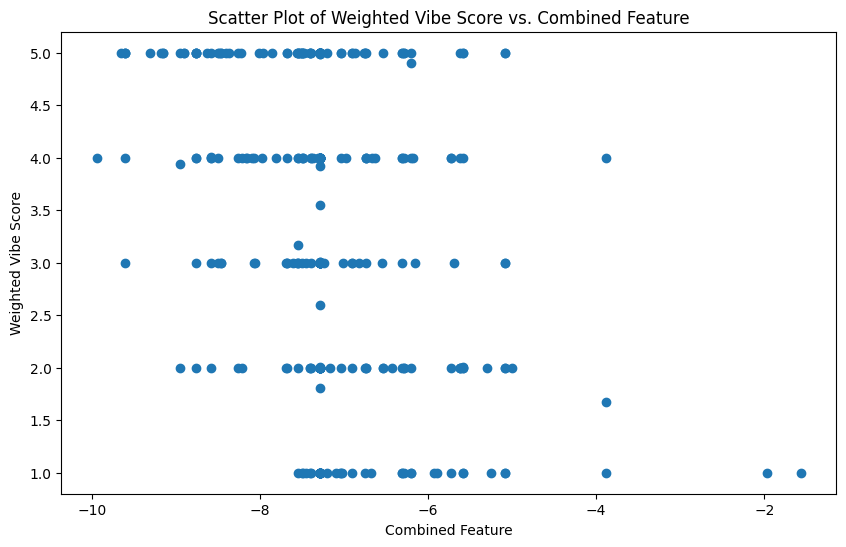

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['combined_feature_performance'], df_merged['Weighted_vibe_Score'])
plt.xlabel('Combined Feature')
plt.ylabel('Weighted Vibe Score')
plt.title('Scatter Plot of Weighted Vibe Score vs. Combined Feature')
plt.show()

In [ ]:
quantile_20 = df_merged['combined_feature_performance'].quantile(0.2)
quantile_80 = df_merged['combined_feature_performance'].quantile(0.8)
range_80_20 = quantile_80 - quantile_20

df_merged['should_chat_performance'] = np.where(
    df_merged['combined_feature_performance'] < quantile_20,
    ((df_merged['combined_feature_performance'] - quantile_20) / range_80_20) * 100,
    np.where(
        df_merged['combined_feature_performance'] > quantile_80,
        ((df_merged['combined_feature_performance'] - quantile_80) / range_80_20) * 100,
        0
    )
)

In [ ]:
df_merged.head()

,Employee_ID,Manager_Feedback,Promotion_Consideration,Performance_Rating,Weighted_vibe_Score,combined_feature_performance,should_chat_performance
0,EMP0002,2.00,1.0,3.0,1.0000,-5.087850,145.098190
1,EMP0003,1.50,0.5,2.5,2.9996,-7.691552,-1.883496
2,EMP0004,0.50,0.0,2.5,4.0000,-5.724668,84.690948
3,EMP0005,0.00,0.0,0.0,3.0000,-7.286052,0.000000
4,EMP0006,1.25,0.5,1.5,5.0000,-9.174345,-142.538071


In [ ]:
df_merged.to_csv('combined_feature_performance.csv', index = False)